In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# csv 파일을 읽어온다.
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
combine = [train, test]

In [3]:
# 테스트에 사용할 컬럼들이 어떤 게 있는지 확인한다.
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# 맨 위 다섯개를 확인하여, 데이터가 어떤 식으로 구현되는지 체크한다. 이름, 성별, Ticket, Cabin, Embarked는 숫자 데이터가 아니다.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 정보를 확인한다. Age, Cabin, Embarked 는 데이터가 모자라다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# 데이터를 확인한다. 다음과 같은 사항을 확인할 수 있다.
# 1. 생존은 카테고리 데이터이다 (0, 1)
# 2. Pclass는 1,2,3 중 하나이다.
# 3. 나이에서 제일 어린건 4개월, 제일 나이 많은건 80살
# 4. 제일 비싸게 주고 탄 사람은 512달러
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Long, Mr. Milton Clyde",male,347082,G6,S
freq,1,577,7,4,644


위에서 데이터를 확인하였다. 이제 데이터 사이의 연관관계를 찾고 싶다.
먼저 Pclass와 Serviced 사이에 어떤 연관관계가 있는지 알고 싶다. 1등석에 탄 사람이 생존률이 높았을까?


In [6]:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


데이터로 미루어 보아, 1등석에 탄 사람이 생존률이 높았음을 알 수 있다. 성별와 생존률의 관계는 어떻게 될까?

In [25]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여자가 남자보다 생존률이 유의미하게 높다. 성별과 생존률 사이에는 연관관계가 존재한다.

In [30]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


형제의 수와 생존률도 연관이 있음을 확인할 수 있다.

In [7]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [10]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['Parch', 'SibSp', 'FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize     Parch     SibSp  Survived
0           1  0.000000  0.000000  0.303538
1           2  0.236025  0.763975  0.552795
2           3  1.127451  0.872549  0.578431
3           4  1.655172  1.344828  0.724138
4           5  1.866667  2.133333  0.200000
5           6  2.181818  2.818182  0.136364
6           7  2.750000  3.250000  0.333333
7           8  2.666667  4.333333  0.000000
8          11  2.000000  8.000000  0.000000


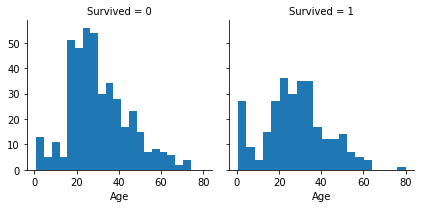

In [12]:
q = sns.FacetGrid(train, col='Survived')
q.map(plt.hist, 'Age', bins=20)

In [17]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


1. 젊은 사람이 많이 죽었다.
2. 어린 애들이 많이 살았다.
3. 노인들은 다 살았다.

In [29]:
train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).agg(['mean', 'count'])

Survived      
                       mean count
Ticket                           
110152             1.000000     3
110413             0.666667     3
110465             0.000000     2
110564             1.000000     1
110813             1.000000     1
111240             0.000000     1
111320             0.000000     1
111361             1.000000     2
111369             1.000000     1
111426             1.000000     1
111427             1.000000     1
111428             1.000000     1
112050             0.000000     1
112052             0.000000     1
112053             1.000000     1
112058             0.000000     1
112059             0.000000     1
112277             1.000000     1
112379             0.000000     1
113028             0.000000     1
113043             0.000000     1
113050             0.000000     1
113051             0.000000     1
113055             1.000000     1
113056             0.000000     1
113059             0.000000     1
113501             0.000000     1
113503             0.000000     1
113505             1.000000     2
113509             0.000000     1
...                     ...   ...
SOTON/OQ 392082    0.000000     1
SOTON/OQ 392086    0.000000     1
SOTON/OQ 392089    1.000000     1
SOTON/OQ 392090    0.000000     1
STON/O 2. 3101269  1.000000     1
STON/O 2. 3101273  0.000000     1
STON/O 2. 3101274  0.000000     1
STON/O 2. 3101275  0.000000     1
STON/O 2. 3101280  0.000000     1
STON/O 2. 3101285  1.000000     1
STON/O 2. 3101286  1.000000     1
STON/O 2. 3101288  1.000000     1
STON/O 2. 3101289  1.000000     1
STON/O 2. 3101292  0.000000     1
STON/O 2. 3101293  0.000000     1
STON/O 2. 3101294  0.000000     1
STON/O2. 3101271   0.000000     1
STON/O2. 3101279   0.500000     2
STON/O2. 3101282   1.000000     1
STON/O2. 3101283   1.000000     1
STON/O2. 3101290   0.000000     1
SW/PP 751          1.000000     1
W./C. 14258        1.000000     1
W./C. 14263        0.000000     1
W./C. 6607         0.000000     2
W./C. 6608         0.000000     4
W./C. 6609         0.000000     1
W.E.P. 5734        0.000000     1
W/C 14208          0.000000     1
WE/P 5735          0.500000     2

[681 rows x 2 columns]

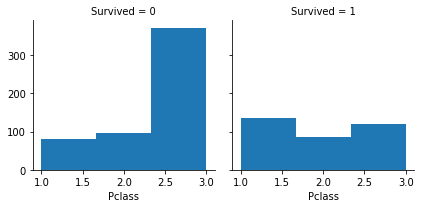

In [47]:
q = sns.FacetGrid(train, col='Survived')
q.map(plt.hist, 'Pclass', bins=3)

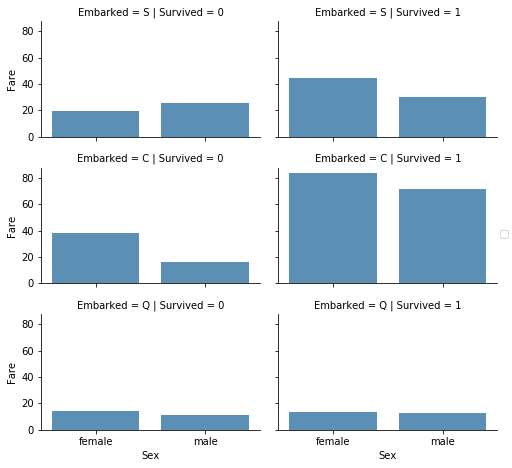

In [49]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()

In [50]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [55]:
train[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Embarked,Fare
0,C,59.954144
2,S,27.079812
1,Q,13.276030


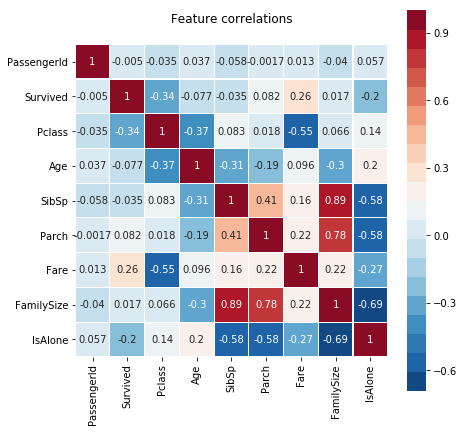

In [66]:
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Feature correlations', y=1.05, size=12)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=sns.color_palette("RdBu_r",20), linecolor='white', annot=True)